In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load oecd data from github repository

# When merged, change "oecd" by "main" in url
url = "https://raw.githubusercontent.com/OpenGeoScales/ogs-data-exploration/oecd/data/ghg-emissions/oecd/AIR_GHG_07042021221914030.csv"
oecd_original = pd.read_csv(url)

In [3]:
oecd_original.head()

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,424998.381,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,426015.210,NaN,NaN
2,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430216.380,NaN,NaN
3,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1993,1993,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430612.556,NaN,NaN
4,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1994,1994,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430653.332,NaN,NaN


In [4]:
# Get df shape
row, col = oecd_original.shape
print(row)
print(col)

52583
17


# Pollutant coverage

In [5]:
# Amount of data by pollutant
oecd_original.groupby(['Pollutant']).size()

Pollutant
Carbon dioxide                       3464
Greenhouse gases                    32328
Hydrofluorocarbons                   2811
Methane                              3464
Nitrogen trifluoride                  791
Nitrous oxide                        3464
Perfluorocarbons                     2795
Sulphur hexafluoride                 3145
Unspecified mix of HFCs and PFCs      321
dtype: int64

In [6]:
# Variables by pollutant
pollutants = oecd_original["Pollutant"].unique()
for pol in pollutants:
    print(pol)
    print(oecd_original[oecd_original["Pollutant"]==pol]["Variable"].unique())
    print()

Greenhouse gases
['Total  emissions excluding LULUCF'
 'Total GHG excl. LULUCF, Index 1990=100'
 'Total GHG excl. LULUCF per capita' '5 - Waste'
 '2- Industrial processes and product use' '1 - Energy' '3 - Agriculture'
 '6 - Other' 'Total GHG excl. LULUCF per unit of GDP'
 '1A1 - Energy Industries'
 'Land use, land-use change and forestry (LULUCF)'
 '1A4 - Residential and other sectors' '1A5 - Energy - Other'
 '1B - Fugitive Emissions from Fuels'
 '1A2 - Manufacturing industries and construction' '1A3 - Transport'
 'Total  emissions including LULUCF'
 'Total GHG excl. LULUCF, Index 2000=100'
 '1C - CO2 from Transport and Storage'
 'Agriculture, Forestry and Other Land Use (AFOLU)'
 '1A4 - Residential and other sectors\t']

Carbon dioxide
['Total  emissions excluding LULUCF'
 'Total GHG excl. LULUCF, Index 2000=100'
 'Total GHG excl. LULUCF, Index 1990=100']

Methane
['Total  emissions excluding LULUCF'
 'Total GHG excl. LULUCF, Index 2000=100'
 'Total GHG excl. LULUCF, Index 1990=100']

In [7]:
# Units of each variable
oecd_original.groupby(['Pollutant', 'VAR', 'Variable'])["Unit"].unique()

Pollutant                         VAR           Variable                                        
Carbon dioxide                    INDEX_1990    Total GHG excl. LULUCF, Index 1990=100                                       [Index]
                                  INDEX_2000    Total GHG excl. LULUCF, Index 2000=100                                       [Index]
                                  TOTAL         Total  emissions excluding LULUCF                         [Tonnes of CO2 equivalent]
Greenhouse gases                  AFOLU         Agriculture, Forestry and Other Land Use (AFOLU)          [Tonnes of CO2 equivalent]
                                  AGR           3 - Agriculture                                           [Tonnes of CO2 equivalent]
                                  AGR_P         3 - Agriculture                                                         [Percentage]
                                  ENER          1 - Energy                                               

In [8]:
df_pol_var = oecd_original.groupby(['POL', 'VAR'])["Unit"].unique().reset_index().drop(["Unit"], axis=1)
var_array = df_pol_var["POL"].values + "__" + df_pol_var["VAR"].values
var_array = np.insert(var_array, 0, ["COU", "Year", "Country"])
var_array

array(['COU', 'Year', 'Country', 'CH4__INDEX_1990', 'CH4__INDEX_2000',
       'CH4__TOTAL', 'CO2__INDEX_1990', 'CO2__INDEX_2000', 'CO2__TOTAL',
       'GHG__AFOLU', 'GHG__AGR', 'GHG__AGR_P', 'GHG__ENER',
       'GHG__ENER_CO2', 'GHG__ENER_CO2_P', 'GHG__ENER_FU',
       'GHG__ENER_FU_P', 'GHG__ENER_IND', 'GHG__ENER_IND_P',
       'GHG__ENER_MANUF', 'GHG__ENER_MANUF_P', 'GHG__ENER_OSECT',
       'GHG__ENER_OSECT_P', 'GHG__ENER_OTH', 'GHG__ENER_OTH_P',
       'GHG__ENER_P', 'GHG__ENER_TRANS', 'GHG__ENER_TRANS_P',
       'GHG__GHG_CAP', 'GHG__GHG_GDP', 'GHG__INDEX_1990',
       'GHG__INDEX_2000', 'GHG__IND_PROC', 'GHG__IND_PROC_P',
       'GHG__LULUCF', 'GHG__OTH', 'GHG__OTH_P', 'GHG__TOTAL',
       'GHG__TOTAL_LULU', 'GHG__WAS', 'GHG__WAS_P', 'HFC__INDEX_1990',
       'HFC__INDEX_2000', 'HFC__TOTAL', 'HFC_PFC__INDEX_1990',
       'HFC_PFC__INDEX_2000', 'HFC_PFC__TOTAL', 'N2O__INDEX_1990',
       'N2O__INDEX_2000', 'N2O__TOTAL', 'NF3__INDEX_1990',
       'NF3__INDEX_2000', 'NF3__TOTAL', 'P

# Spatial coverage

In [9]:
# Spatial coverage: Number of countries
n_countries = oecd_original["Country"].nunique()
n_countries

48

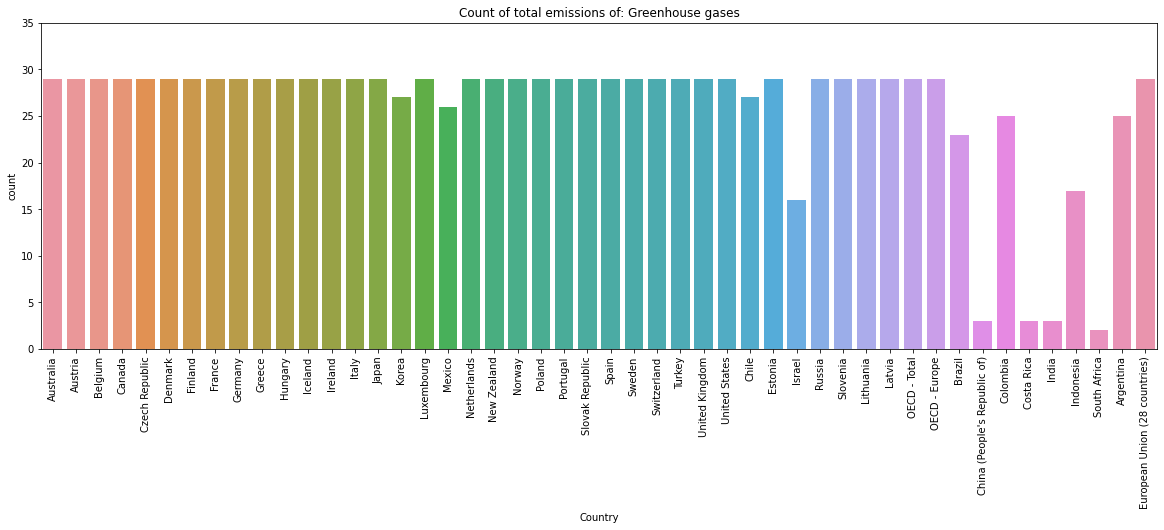

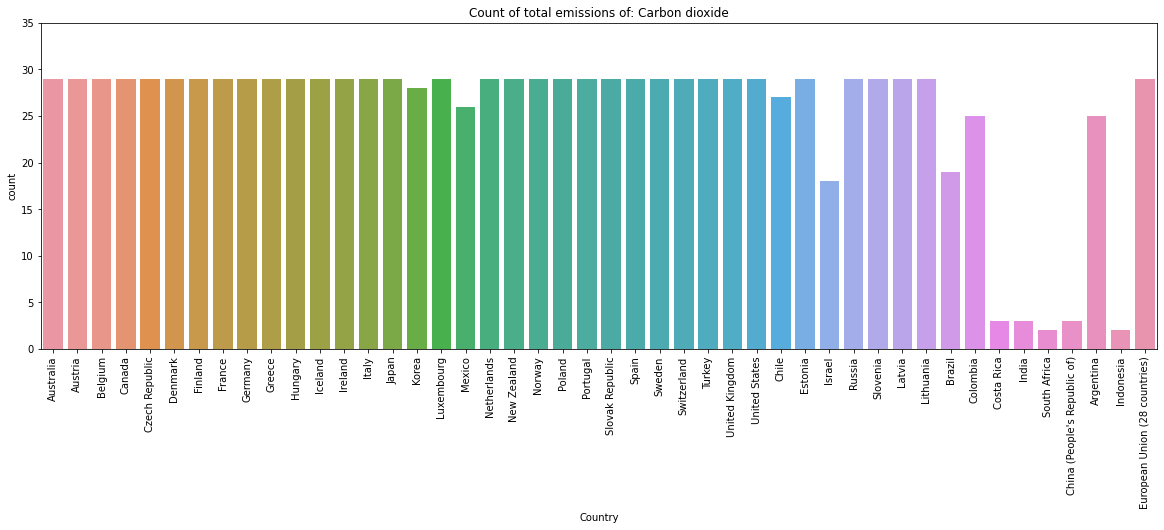

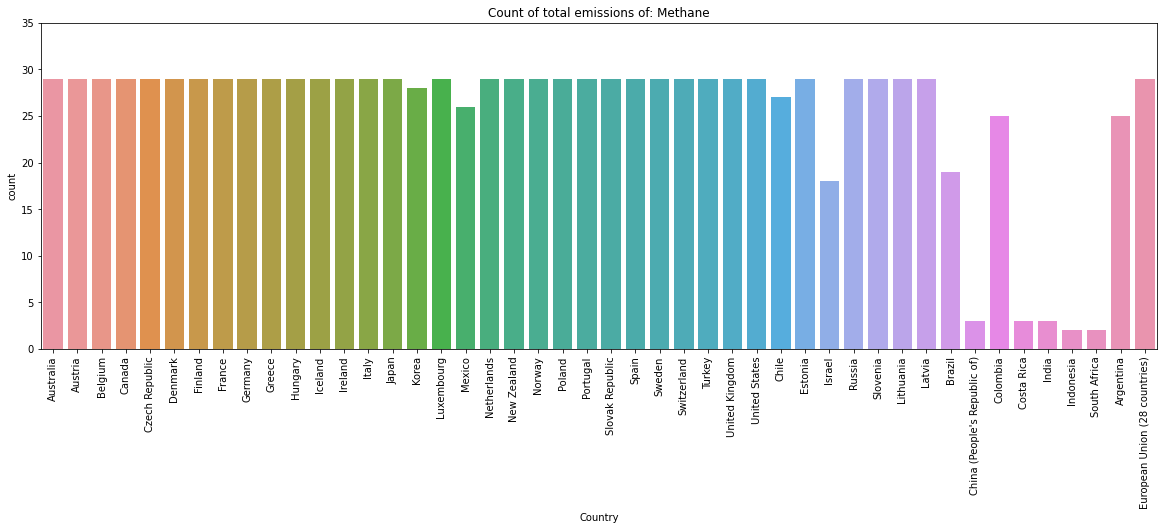

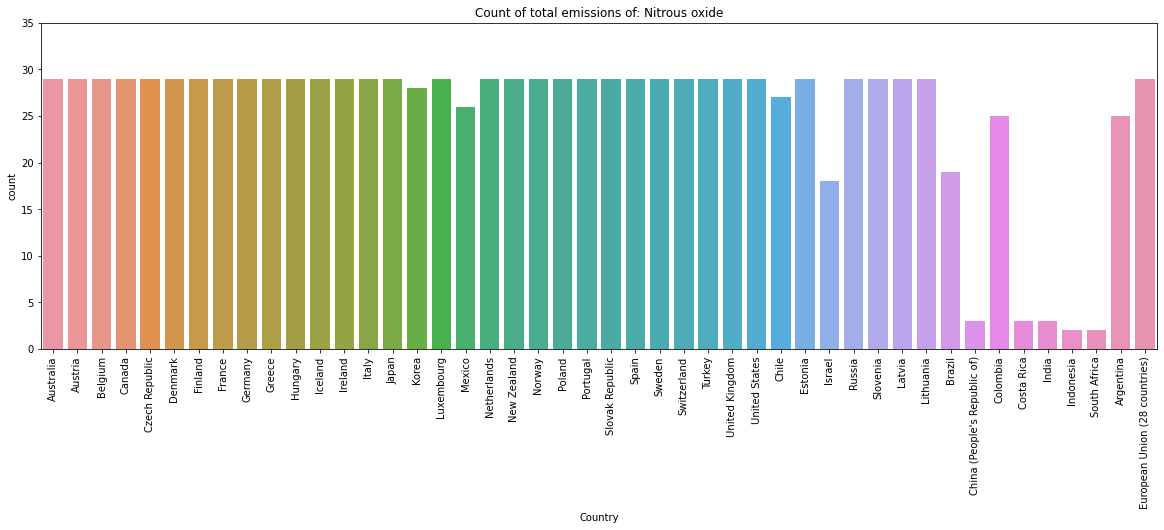

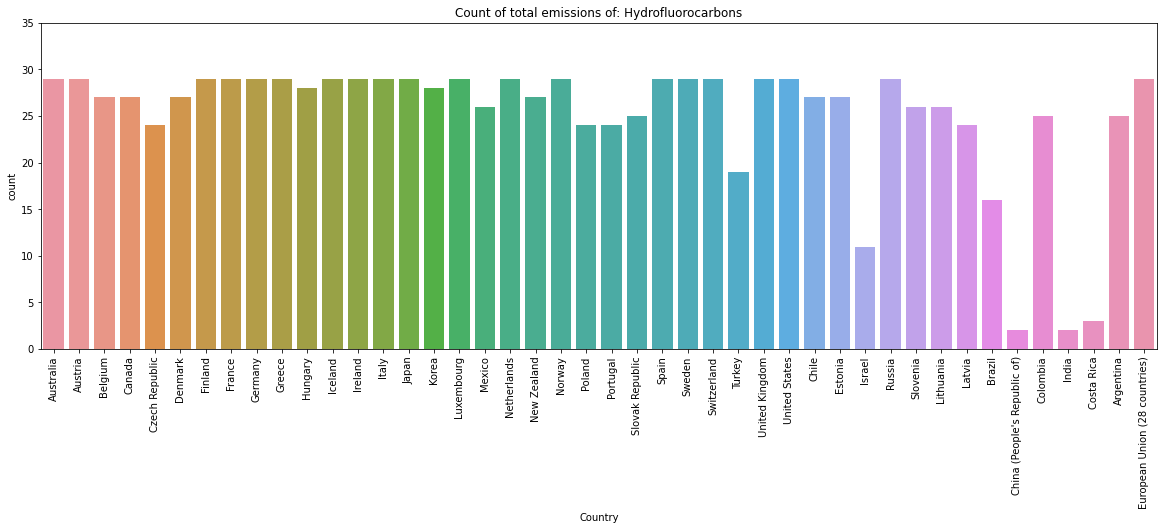

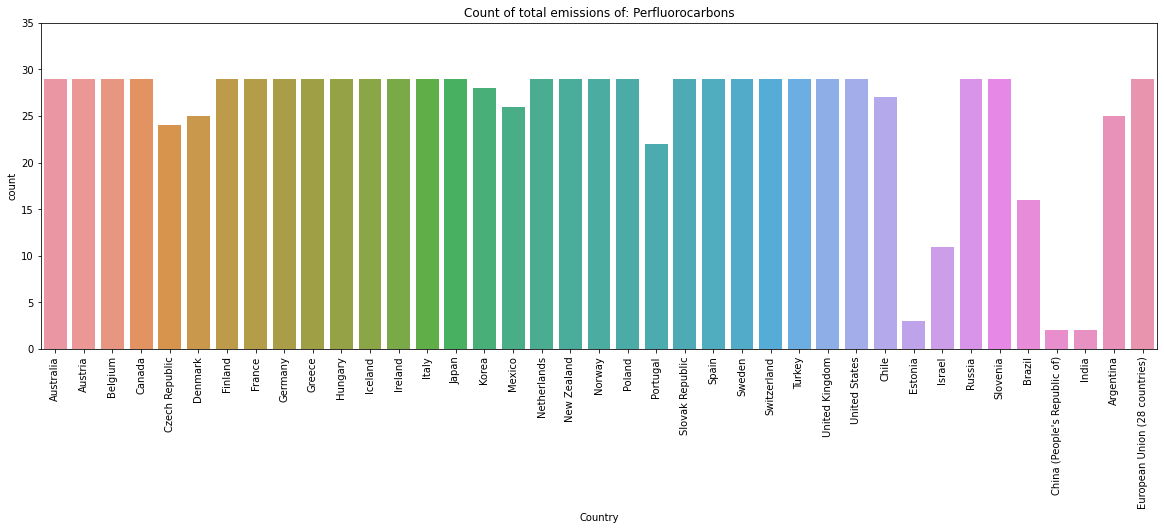

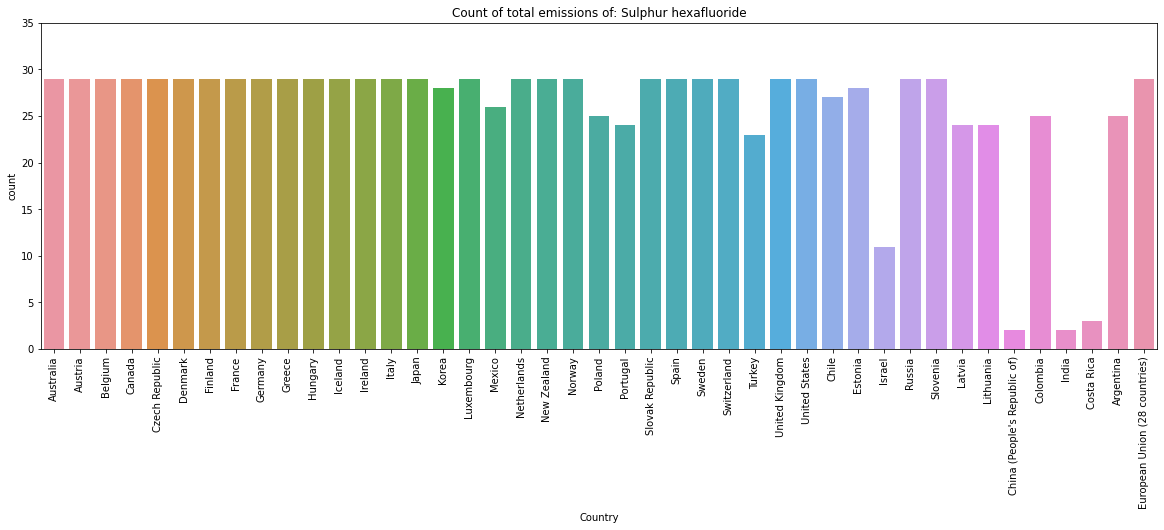

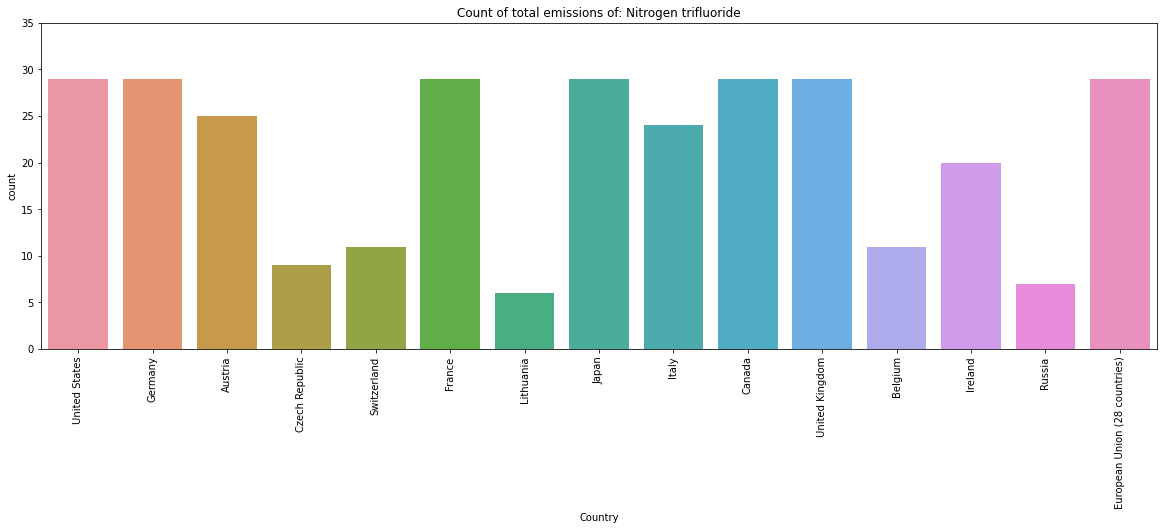

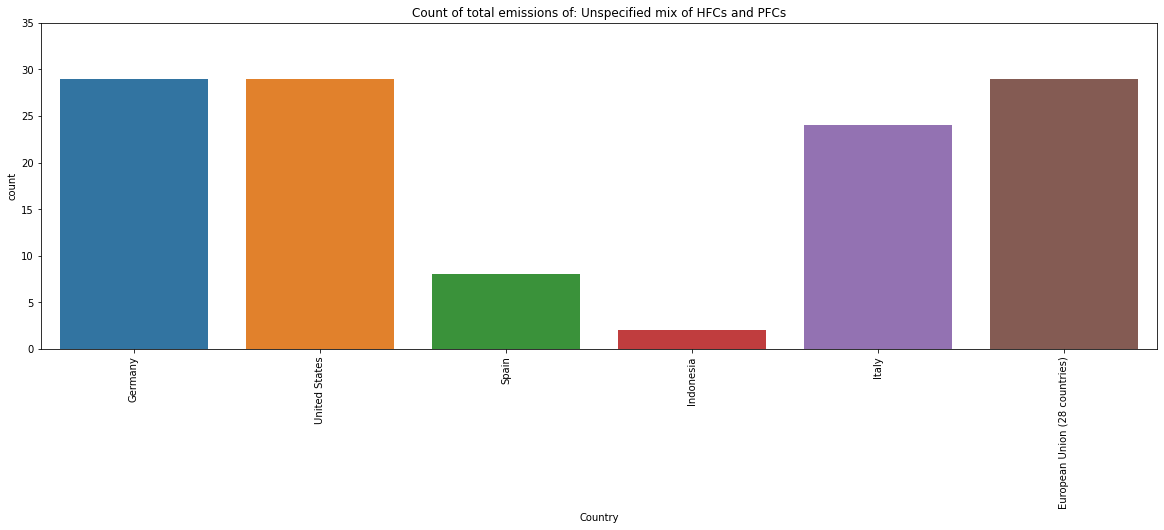

In [10]:
# Plot number of reports per country and per pollutant, taking "Total  emissions excluding LULUCF" as variable
for i in range(len(pollutants)):
    plt.figure(i, figsize=(20,6))
    plt.title("Count of total emissions of: " + str(pollutants[i]))
    sns.countplot(x="Country", data=oecd_original.loc[(oecd_original["Pollutant"]==pollutants[i]) & (oecd_original["VAR"]=="TOTAL")])
    plt.ylim(0, 35)
    plt.xticks(rotation='vertical')

# Temporal coverage

In [11]:
# Temporal coverage: Number of considered years
print(oecd_original['Year'].min())
print(oecd_original['Year'].max())

1990
2018


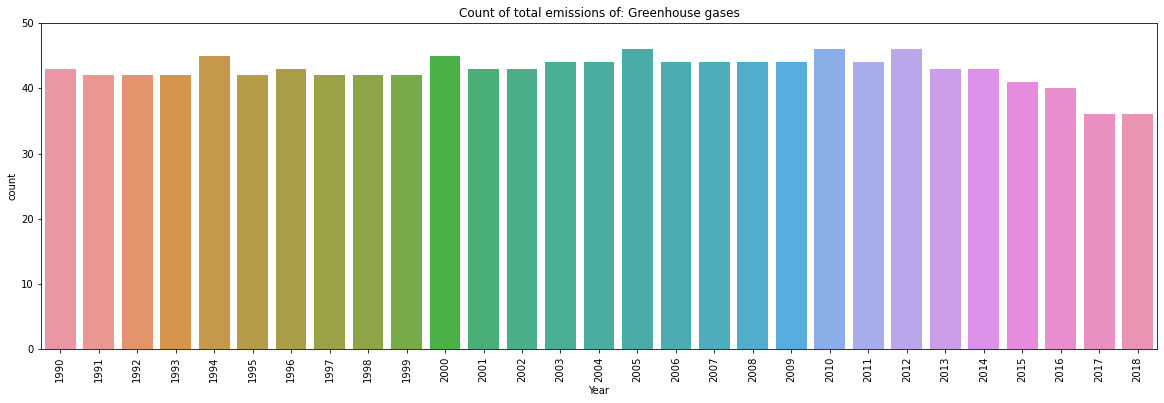

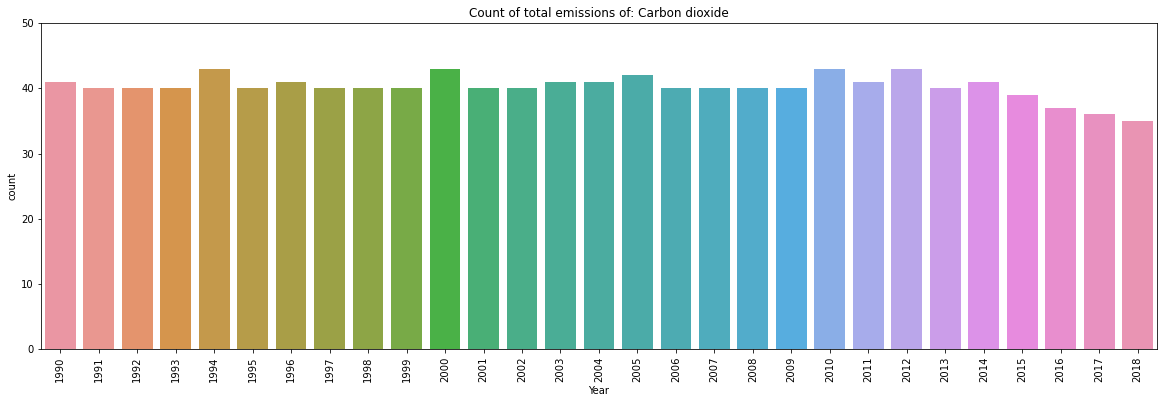

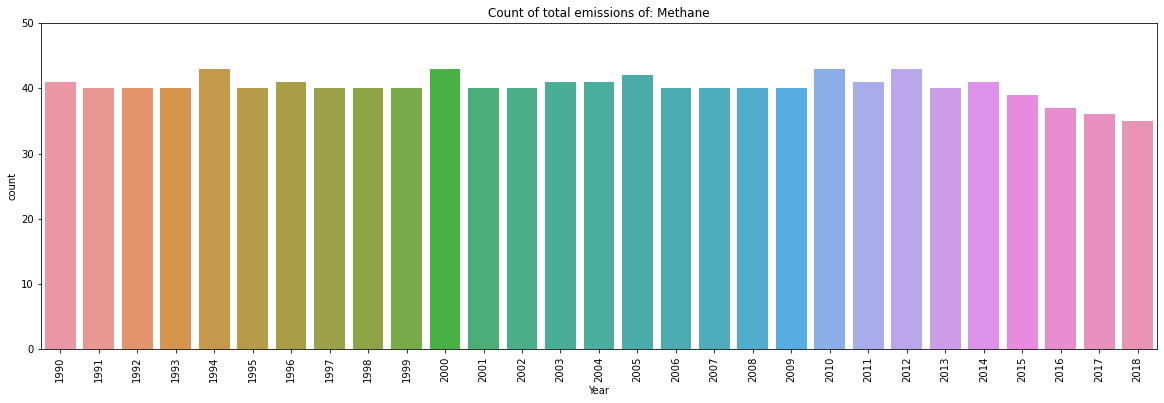

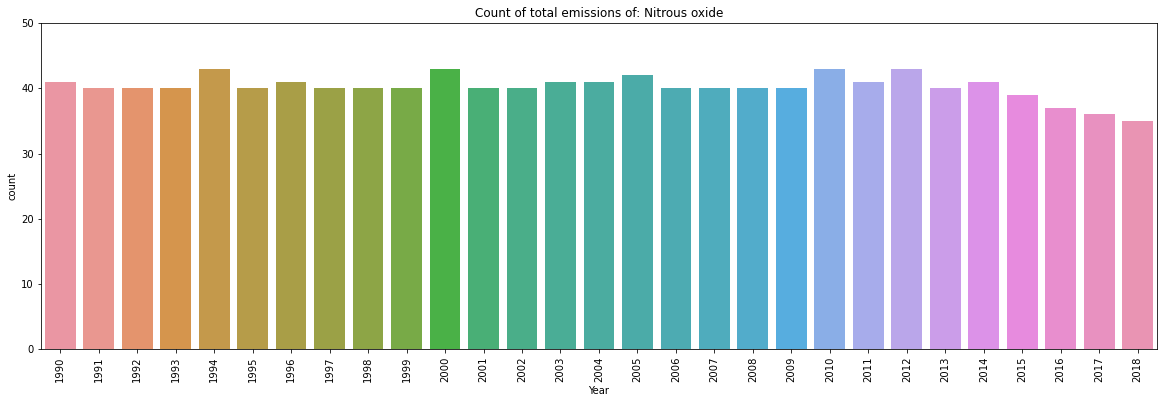

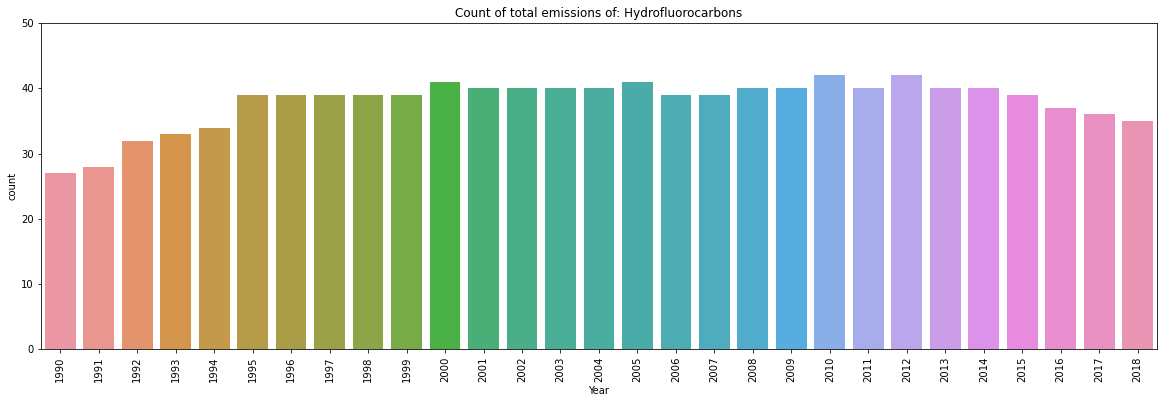

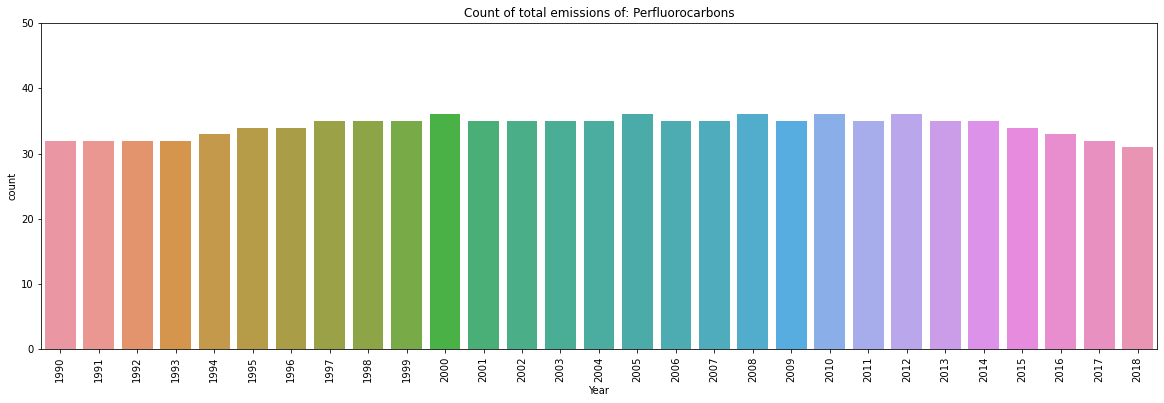

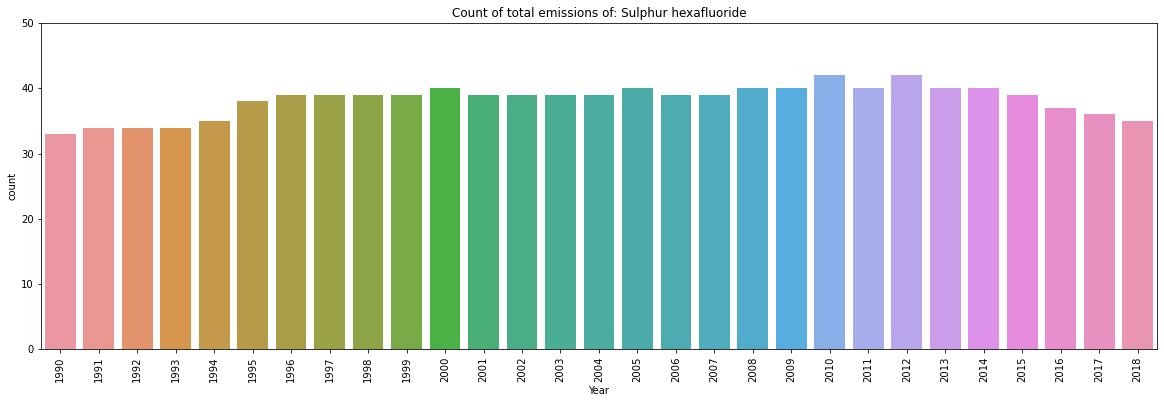

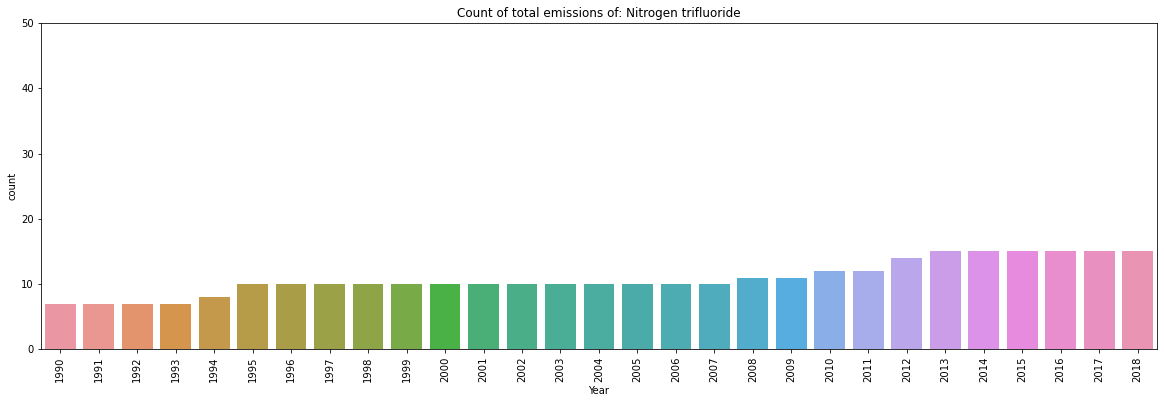

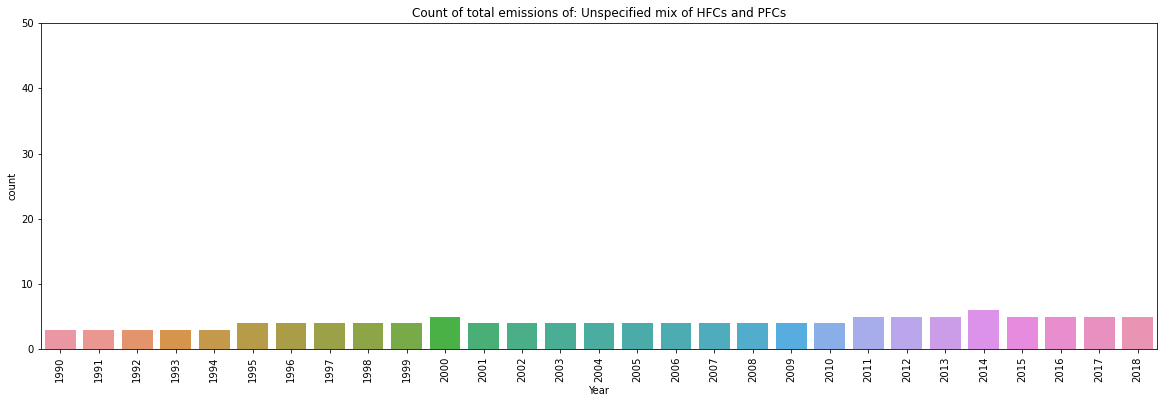

In [12]:
# Plot number of reports per year and per pollutant, taking "Total  emissions excluding LULUCF" as variable
for i in range(len(pollutants)):
    plt.figure(i, figsize=(20,6))
    plt.title("Count of total emissions of: " + str(pollutants[i]))
    sns.countplot(x="Year", data=oecd_original.loc[(oecd_original["Pollutant"]==pollutants[i]) & (oecd_original["VAR"]=="TOTAL")])
    plt.ylim(0, 50)
    plt.xticks(rotation='vertical')

# Data Consolidation

In [13]:
# Build a dictionary with "COU" and "Country"
# country_dict = oecd_original.groupby(['COU','Country']).size().reset_index().drop([0], axis=1)
# country_dict = dict(zip(country_dict.COU, country_dict.Country))
# country_dict

country_dict = oecd_original.groupby(['COU'])["Country"].unique().to_dict()
# country_dict = dict(zip(country_dict.COU, country_dict.Country))
country_dict

{'ARG': array(['Argentina'], dtype=object),
 'AUS': array(['Australia'], dtype=object),
 'AUT': array(['Austria'], dtype=object),
 'BEL': array(['Belgium'], dtype=object),
 'BRA': array(['Brazil'], dtype=object),
 'CAN': array(['Canada'], dtype=object),
 'CHE': array(['Switzerland'], dtype=object),
 'CHL': array(['Chile'], dtype=object),
 'CHN': array(["China (People's Republic of)"], dtype=object),
 'COL': array(['Colombia'], dtype=object),
 'CRI': array(['Costa Rica'], dtype=object),
 'CZE': array(['Czech Republic'], dtype=object),
 'DEU': array(['Germany'], dtype=object),
 'DNK': array(['Denmark'], dtype=object),
 'ESP': array(['Spain'], dtype=object),
 'EST': array(['Estonia'], dtype=object),
 'EU28': array(['European Union (28 countries)'], dtype=object),
 'FIN': array(['Finland'], dtype=object),
 'FRA': array(['France'], dtype=object),
 'GBR': array(['United Kingdom'], dtype=object),
 'GRC': array(['Greece'], dtype=object),
 'HUN': array(['Hungary'], dtype=object),
 'IDN': array(

In [14]:
# Build a dictionary with the pollutants and the variables for each pollutant
pol_dict = oecd_original.groupby(['POL'])["VAR"].unique().to_dict()
# pol_dict = dict(zip(pol_dict.POL, pol_dict.VAR))
pol_dict

for key in pol_dict:
    for val in pol_dict[key]:
        print(str(key) + " " + str(val))

CH4 TOTAL
CH4 INDEX_2000
CH4 INDEX_1990
CO2 TOTAL
CO2 INDEX_2000
CO2 INDEX_1990
GHG TOTAL
GHG INDEX_1990
GHG GHG_CAP
GHG WAS
GHG IND_PROC
GHG ENER
GHG AGR
GHG OTH
GHG GHG_GDP
GHG ENER_IND
GHG LULUCF
GHG ENER_OSECT
GHG ENER_OTH
GHG ENER_FU
GHG ENER_MANUF
GHG ENER_TRANS
GHG TOTAL_LULU
GHG INDEX_2000
GHG ENER_CO2
GHG AFOLU
GHG ENER_IND_P
GHG ENER_OTH_P
GHG AGR_P
GHG ENER_P
GHG ENER_MANUF_P
GHG ENER_OSECT_P
GHG WAS_P
GHG IND_PROC_P
GHG ENER_TRANS_P
GHG ENER_FU_P
GHG OTH_P
GHG ENER_CO2_P
HFC TOTAL
HFC INDEX_2000
HFC INDEX_1990
HFC_PFC TOTAL
HFC_PFC INDEX_2000
HFC_PFC INDEX_1990
N2O TOTAL
N2O INDEX_2000
N2O INDEX_1990
NF3 TOTAL
NF3 INDEX_2000
NF3 INDEX_1990
PFC TOTAL
PFC INDEX_2000
PFC INDEX_1990
SF6 TOTAL
SF6 INDEX_2000
SF6 INDEX_1990


In [15]:
# Build an array with all the years
year_array = oecd_original["YEA"].unique().astype('str')
year_array

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'], dtype='<U21')

In [16]:
# Build an array with all the countries
country_array = oecd_original["COU"].unique()
country_array

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'CHL', 'EST', 'ISR', 'RUS', 'SVN', 'LVA',
       'LTU', 'OECD', 'OECDE', 'BRA', 'CHN', 'COL', 'CRI', 'IND', 'IDN',
       'ZAF', 'ARG', 'EU28'], dtype=object)

In [17]:
# Build an array with all the combinations of country codes and years
# This will be used as index to the new dataframe
index_array = []
for country in country_array:
    for year in year_array:
        index_array.append(country + "_" + year)
        
len(index_array)

1392

In [18]:
# Create the final dataframe assigning the index created before
oecd_final = pd.DataFrame(index=index_array)
# Add the country code and the year as features
index_split = oecd_final.index.str.split('_')
oecd_final["COU"] = [x[0] for x in index_split]
oecd_final["Year"] = [x[1] for x in index_split]
oecd_final["Year"] = oecd_final["Year"].astype('int')
oecd_final.reset_index(inplace=True)
oecd_final

,index,COU,Year
0,AUS_1990,AUS,1990
1,AUS_1991,AUS,1991
2,AUS_1992,AUS,1992
3,AUS_1993,AUS,1993
4,AUS_1994,AUS,1994
...,...,...,...
1387,EU28_2014,EU28,2014
1388,EU28_2015,EU28,2015
1389,EU28_2016,EU28,2016
1390,EU28_2017,EU28,2017


In [19]:
for key in pol_dict:
    for val in pol_dict[key]:
        temp = oecd_original.loc[(oecd_original["POL"]==key) & (oecd_original["VAR"]==val)][["COU", "Year", "Value"]]
        oecd_final = pd.merge(left=oecd_final, right=temp, how="left", left_on=["COU", "Year"], right_on=["COU", "Year"])
        oecd_final.rename({"Value": key+"__"+val}, axis=1, inplace=True)
        
oecd_final.set_index("index", inplace=True)
oecd_final.index.name = None
oecd_final

,COU,Year,CH4__TOTAL,CH4__INDEX_2000,CH4__INDEX_1990,CO2__TOTAL,CO2__INDEX_2000,CO2__INDEX_1990,GHG__TOTAL,GHG__INDEX_1990,...,N2O__INDEX_1990,NF3__TOTAL,NF3__INDEX_2000,NF3__INDEX_1990,PFC__TOTAL,PFC__INDEX_2000,PFC__INDEX_1990,SF6__TOTAL,SF6__INDEX_2000,SF6__INDEX_1990
AUS_1990,AUS,1990,124383.179,106.584,100.000,278424.660,79.506,100.000,424998.381,100.000,...,100.000,NaN,NaN,NaN,4607.013,357.948,100.000,220.560,103.829,100.000
AUS_1991,AUS,1991,124308.869,106.521,99.940,279872.660,79.919,100.520,426015.210,100.239,...,97.620,NaN,NaN,NaN,4610.743,358.238,100.081,239.342,112.670,108.516
AUS_1992,AUS,1992,123741.408,106.035,99.484,284912.438,81.358,102.330,430216.380,101.228,...,96.422,NaN,NaN,NaN,4603.283,357.658,99.919,258.112,121.506,117.026
AUS_1993,AUS,1993,120117.915,102.930,96.571,289235.186,82.593,103.883,430612.556,101.321,...,99.366,NaN,NaN,NaN,3315.528,257.604,71.967,276.869,130.336,125.530
AUS_1994,AUS,1994,116834.942,100.116,93.931,294014.961,83.957,105.599,430653.332,101.331,...,102.370,NaN,NaN,NaN,2164.429,168.168,46.981,295.606,139.157,134.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EU28_2014,EU28,2014,459501.619,75.816,63.036,3480937.318,83.321,77.939,4300747.773,76.147,...,62.035,70.101,67.767,294.840,3325.668,27.269,12.851,5801.464,54.605,52.352
EU28_2015,EU28,2015,459247.546,75.774,63.002,3518768.001,84.227,78.786,4335347.179,76.760,...,62.153,64.651,62.499,271.920,3427.695,28.105,13.245,6098.411,57.399,55.032
EU28_2016,EU28,2016,453520.717,74.830,62.216,3500042.739,83.778,78.367,4308422.079,76.283,...,61.929,61.612,59.561,259.137,3848.556,31.556,14.872,6381.262,60.062,57.584
EU28_2017,EU28,2017,452761.631,74.704,62.112,3513036.182,84.089,78.658,4323066.703,76.542,...,63.105,60.414,58.402,254.096,3475.363,28.496,13.429,6625.796,62.363,59.791
